In [1]:
import numpy as np
from astropy.io import votable
from image_stack import ImageStack

%matplotlib inline 
from matplotlib import pyplot as plt

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
"""
colourblind-safe colours
"""
COLORS = (
    '#000000',
    '#0072b2',
    '#56b4e9',
    '#009e73',
    '#cc79a7',
    '#d55e00',
    '#e69f00',
    '#f0e442')

cm = plt.get_cmap('cubehelix')
print cm(0.5)

(0.6328422475018423, 0.4747981096220677, 0.29070209208025455, 1.0)


In [3]:
OBSID=1147217904 # all sources visible
FREQ="057-068"

In [4]:
tab = votable.parse_single_table('%d_057-068_moment2_comp.vot' % OBSID)
imstack = ImageStack("%d.hdf5" % OBSID, freq=FREQ)

In [12]:
print imstack.group['WSCTIMES'][...]
print len(imstack.group['WSCTIMES'][...])

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [13]:
ta = tab.array

In [14]:
#print tab['peak_flux']/tab['local_rms']
b = np.argsort(-ta['peak_flux']/ta['local_rms']) # brightest first
print b[:10]

[359 304 227  57 224 262 237 358 130  14]


In [15]:
t = imstack.get_intervals()
print imstack.wcs.printwcs()

WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : -16.11568  -26.78234  79980000.0  -5.0  
CRPIX : 1996.758  381.641  1.0  1.0  
PC1_1 PC1_2 PC1_3 PC1_4 : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4 : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4 : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4 : 0.0  0.0  0.0  1.0  
CDELT : -0.03333334  0.03333334  15360000.0  1.0  
NAXIS    : 2400 2400
None


In [16]:
N=20
ts = []
ts_noise = []
for i in range(N):
    x, y = imstack.world2pix(ta['ra'][b[i]], ta['dec'][b[i]] )
    print x, y
    ts.append(imstack.pix2ts(x, y))
    ts_noise.append(imstack.pix2ts(x+5, y+5))

1838 1260
1473 1117
1147 957
1813 687
1461 953
1588 1068
1382 979
1658 1259
1399 750
1067 425
1520 820
1201 1494
794 837
1152 568
1364 907
1774 1013
1315 514
1421 1261
1000 1228
994 974


In [22]:
print len(ts[0])
print sum(ts[0]>1)
print ts[0]


591
576
[  0.           0.           0.           0.           0.
   0.           0.           0.          92.85951789  86.85937156
 117.75494062 114.9601706   84.34358599  86.73823682 107.60880487
 116.74506367 124.83982016 110.2385115   95.16323299  75.8327437
  81.12000613 104.55996484  87.64680387  99.96788555 120.68407223
 105.49945948  75.31183863  77.77529152  75.17010944  83.69468135
  61.78778268  56.1641135   50.20775731  64.10875218  82.70504996
 106.37721183 115.15646943 136.05877572 122.68469906  68.86980956
  53.54265698  58.05382585  63.30468116  76.89977615  51.54544204
  50.78485331  59.74022062  65.7185001   90.99182631  98.67455021
  88.38012829  52.71795047  42.25916291  64.15578488  99.34562953
 116.86762474 106.31161128  51.59858535  51.27957153  58.88647461
 114.78828342 143.6521031   98.75561455  71.02809114  58.33296422
  73.33658801  96.37978297 111.62806714  75.15688261  73.89848702
  73.30068369  68.54119115  55.16944894  63.74691278  69.03895698
  74.252830

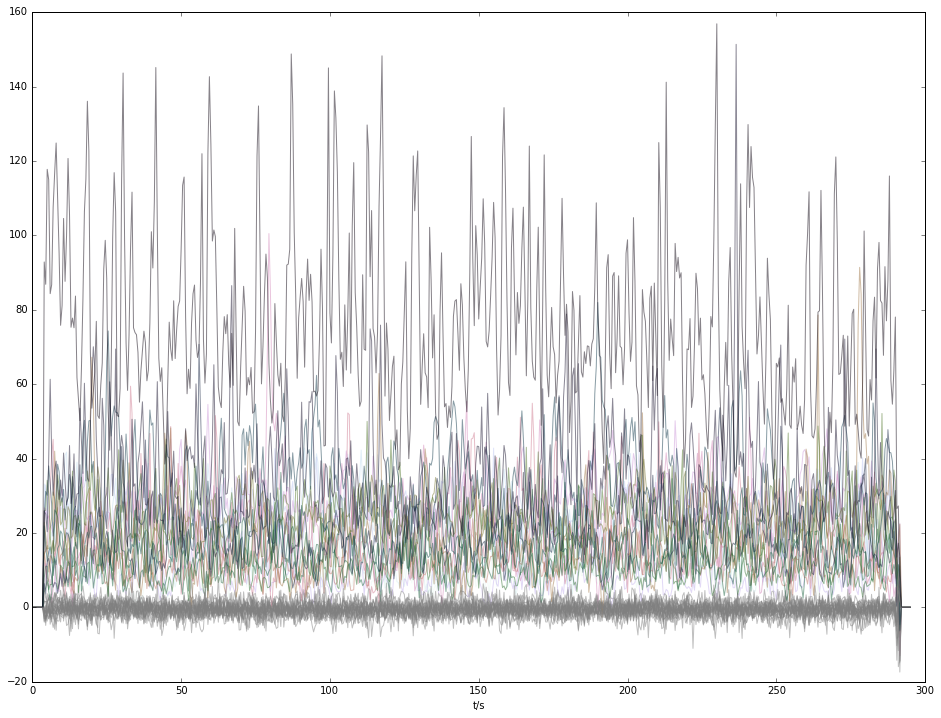

In [17]:
plt.figure(figsize=(16.0, 12.0))

for i in range(N):
    plt.plot(t, ts[N-1-i], color=cm(1-float(i)/N), alpha=0.5)
    plt.plot(t, ts_noise[N-1-i], color='grey', alpha=0.5)
plt.xlabel("t/s")
#for i in range(100):
#    print i,
#    print ts[0][i]

20


(0, 10)

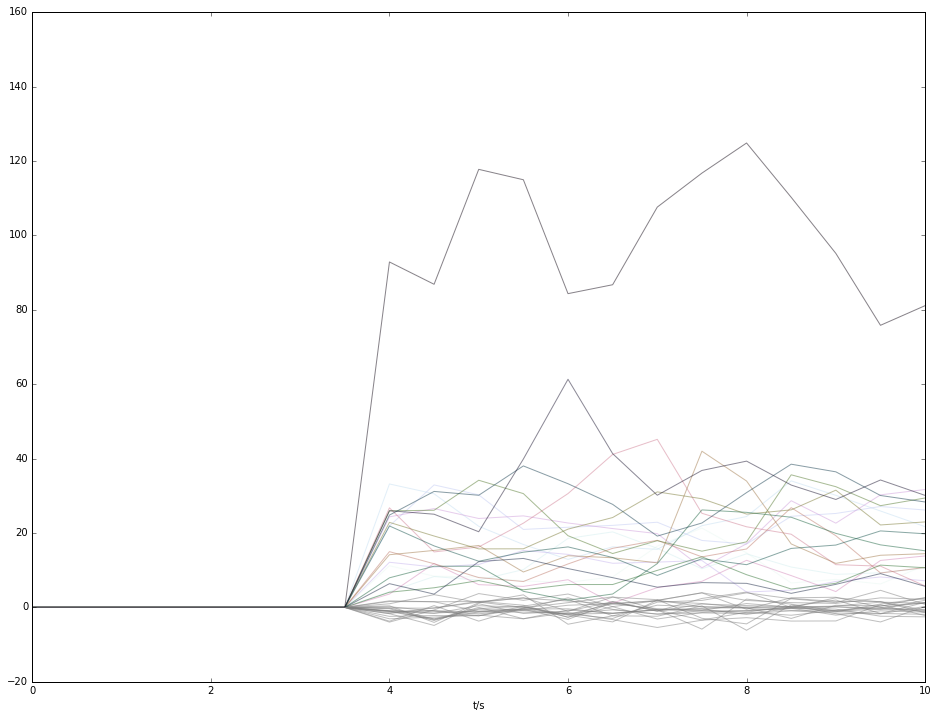

In [18]:
plt.figure(figsize=(16.0, 12.0))
for i in range(N):
    plt.plot(t, ts[N-1-i], color=cm(1-float(i)/N), alpha=0.5)
    plt.plot(t, ts_noise[N-1-i], color='grey', alpha=0.5)
plt.xlabel("t/s")
plt.xlim([0, 10])
#for i in range(100):
#    print i,
#    print ts[0][i]

(286, 296)

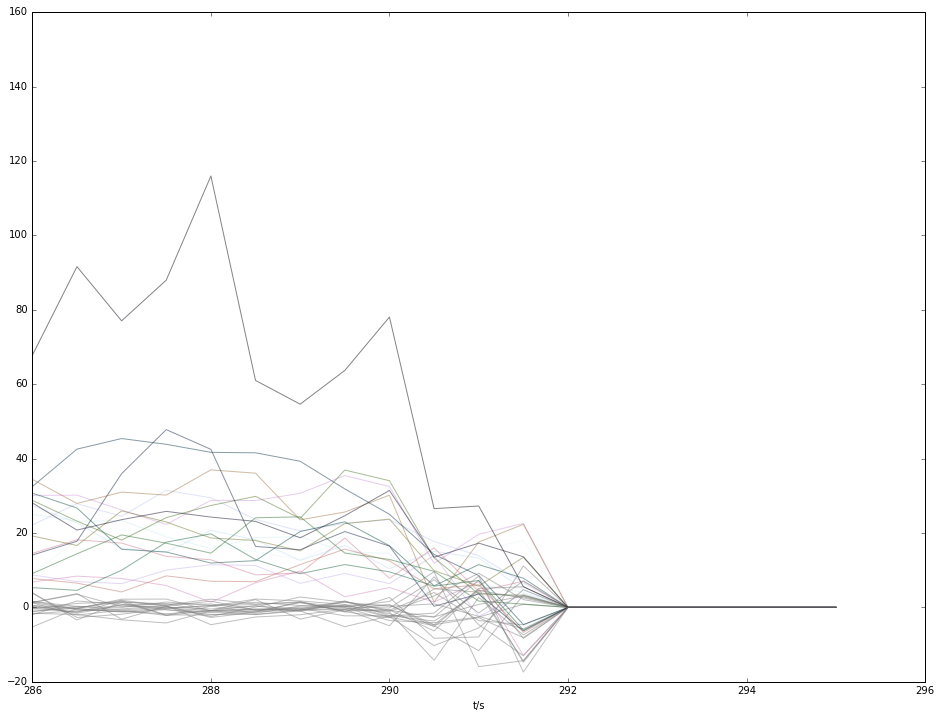

In [19]:
plt.figure(figsize=(16.0, 12.0))

for i in range(N):
    plt.plot(t, ts[N-1-i], color=cm(1-float(i)/N), alpha=0.5)
    plt.plot(t, ts_noise[N-1-i], color='grey', alpha=0.5)
plt.xlabel("t/s")
plt.xlim([286, 296])

#for i in range(100):
#    print i,
#    print ts[0][i]

(497,)


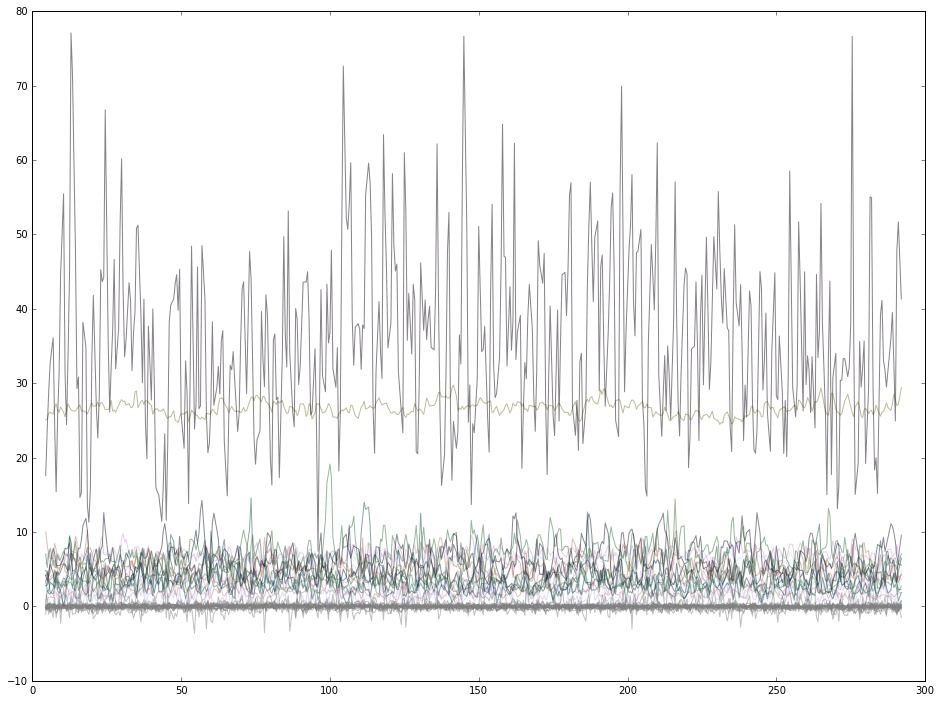

In [11]:
mask = np.equal(ts[0], 0)

plt.figure(figsize=(16.0, 12.0))

for i in range(N):
    plt.plot(t[~mask], ts[N-1-i][~mask], color=cm(1-float(i)/N), alpha=0.5)
    plt.plot(t[~mask], ts_noise[N-1-i][~mask], color='grey', alpha=0.5)
print t[~mask].shape
#for i in range(100):
#    print i,
#    print ts[0][i]

In [12]:
n, m = 10, 10
a = imstack.pix2cube(x, y, n, m)
print a.shape
np.reshape?

(10, 10, 591)


In [13]:
print a.shape
b = np.argwhere(a[n/2, m/2, :] == 0).flatten()
print b
arr = np.delete(a, b, axis=2)
print arr.shape
print b

(10, 10, 591)
[  0   1   2   3   4   5   6   7   8  13  20  28  35  42  50  57  64  72
  79  86  94 101 108 115 123 130 137 145 152 159 167 174 181 189 196 203
 210 218 225 232 240 247 254 262 269 276 284 291 298 305 313 320 327 335
 342 349 357 364 371 379 386 393 400 408 415 422 430 437 444 452 459 466
 474 481 488 495 503 510 517 525 532 539 547 554 561 569 576 583 585 586
 587 588 589 590]
(10, 10, 497)
[  0   1   2   3   4   5   6   7   8  13  20  28  35  42  50  57  64  72
  79  86  94 101 108 115 123 130 137 145 152 159 167 174 181 189 196 203
 210 218 225 232 240 247 254 262 269 276 284 291 298 305 313 320 327 335
 342 349 357 364 371 379 386 393 400 408 415 422 430 437 444 452 459 466
 474 481 488 495 503 510 517 525 532 539 547 554 561 569 576 583 585 586
 587 588 589 590]


In [18]:
flagged = np.argwhere(mask)[:, 0]

In [19]:
print flagged[1:] - flagged[:-1]

[1 1 1 1 1 1 1 1 5 7 8 7 7 8 7 7 8 7 7 8 7 7 7 8 7 7 8 7 7 8 7 7 8 7 7 7 8
 7 7 8 7 7 8 7 7 8 7 7 7 8 7 7 8 7 7 8 7 7 8 7 7 7 8 7 7 8 7 7 8 7 7 8 7 7
 7 8 7 7 8 7 7 8 7 7 8 7 7 2 1 1 1 1 1]
